### Implementing simple Chatbot Using LangGraph

In [1]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


In [4]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o")
llm.invoke("Hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_65564d8ba5', 'id': 'chatcmpl-CU0xGEo69bJJ5k0518i5ORD5jHtDy', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--1acdde10-b4d8-44be-b482-8517f33ec6f1-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [6]:
from langchain_groq import ChatGroq

llm_groq=ChatGroq(model="qwen/qwen3-32b")
llm_groq.invoke("Hey I am jagadesh and i like to play cricket")

AIMessage(content="<think>\nOkay, so the user is Jagadesh and he likes to play cricket. Let me see how to respond appropriately. First, I should acknowledge his introduction and express interest in his hobby. Cricket is a popular sport, so maybe I can ask him about his favorite aspects of playing it. I should check if he plays often, what position he plays, or if he follows any particular teams. Also, maybe he has some favorite players or memorable matches he'd like to talk about. I need to keep the conversation engaging and open-ended to encourage him to share more. Let me make sure my response is friendly and not too formal. I'll start by thanking him for introducing himself and then ask some follow-up questions about his cricket experience.\n</think>\n\nHey Jagadesh! Nice to meet you! 🏏 I love that you enjoy playing cricket—it's such an exciting game. Have you been playing for a while, or are you just getting into it? Do you prefer batting or bowling, or maybe fielding? Also, do you

### We Will start With Creating Nodes

In [7]:
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

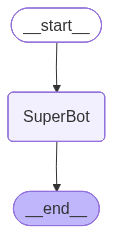

In [8]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile()


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [9]:
## Invocation

graph_builder.invoke({'messages':"Hi,My name is jagadesh And I like cricket"})

{'messages': [HumanMessage(content='Hi,My name is jagadesh And I like cricket', additional_kwargs={}, response_metadata={}, id='c108187b-f318-4776-9cff-2283b892ac26'),
  AIMessage(content="<think>\nOkay, the user introduced himself as Jagadesh and mentioned he likes cricket. I should acknowledge his name first and then delve into his interest in cricket. Let me see... I need to respond in a friendly and engaging way. Maybe ask him to share more about why he likes cricket. He might appreciate some validation of his interest, so pointing out cricket's popularity and excitement could be good. Also, I should invite him to talk about specific aspects like favorite teams, players, or memorable matches. I should keep the tone positive and open-ended to encourage further conversation. Let me check if there's any cultural context I should consider, but since he's using English, it's probably safe to proceed. Avoid any assumptions beyond what he's stated. Make sure the response is concise but co

#### Streaming The responses

In [ ]:
for event in graph_builder.stream({"messages":"Hello My name is jagadesh"}):
    print(event)

{'SuperBot': {'messages': [AIMessage(content="<think>\nOkay, the user introduced themselves as Jagadesh. I should respond warmly and offer help. Maybe say hello and ask how I can assist them. Keep it friendly and open-ended. Make sure to use their name to personalize the interaction. Let them know I'm here to answer questions or help with any tasks. Keep the tone positive and approachable.\n</think>\n\nHello Jagadesh! Nice to meet you. How can I assist you today? Whether you have questions, need help with something specific, or just want to chat, I'm here for you! 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 116, 'prompt_tokens': 14, 'total_tokens': 130, 'completion_time': 0.253172536, 'prompt_time': 0.000538841, 'queue_time': 0.049930888, 'total_time': 0.253711377}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_5cf921caa2', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--1f1